In [1]:
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
import glob

In [2]:
start = time.time()
time.sleep(5)
end = time.time()
end - start

5.000573635101318

In [3]:
extension = 'csv'
all_filenames = [i for i in glob.glob('file*.{}'.format(extension))]
print(all_filenames)

['file1_first150.csv', 'file2_150_600.csv', 'file3_600_800.csv', 'file4_800_1250.csv']


In [4]:
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [5]:
eda_df = pd.read_csv('combined_csv.csv')

In [6]:
eda_df

,Unnamed: 0,thread_title,comment_author,date,comment
0,0,REPORTING AND EXECUTION OF BUMPER CLONES AND A...,Emperor_Hippo,"04-11-2018, 10:12 AM","Dear all, In view of recent bumper clone atta..."
1,0,**[IMPORTANT] EDMW Must-reads!**,leinad,"23-06-2008, 09:56 PM","1) Discrimination of Race, Culture, Derogatory..."
2,1,**[IMPORTANT] EDMW Must-reads!**,Kiwi8,"23-06-2008, 11:50 PM","Dear EDMWers, I would like to remind all of y..."
3,3,**[IMPORTANT] EDMW Must-reads!**,Kiwi8,"20-02-2011, 07:28 PM",Amended Infraction Points System and Banning P...
4,4,**[IMPORTANT] EDMW Must-reads!**,Kiwi8,"20-02-2011, 09:14 PM",2 points: - Thread Digging or Rubbish/Nuisanc...
5,5,**[IMPORTANT] EDMW Must-reads!**,Dr.Vijay,"30-01-2012, 10:43 AM",Removed sticky thread in EDMW for forum respon...
6,6,**[IMPORTANT] EDMW Must-reads!**,Dr.Vijay,"06-09-2014, 08:22 PM",I've moved a few sticky threads to the feedbac...
7,7,**[IMPORTANT] EDMW Must-reads!**,Dr.Vijay,"31-12-2015, 08:12 PM",Added a link on How to preserve a discussion f...
8,8,**[IMPORTANT] EDMW Must-reads!**,Dr.Vijay,"20-06-2018, 10:44 AM","Removed the sticky thread in EDMW on ""HWZ Acco..."
9,0,[PSA] Please post responsibly to avoid mislead...,Dr.Vijay,"26-01-2020, 08:35 PM",PSA: Don't post important information without ...


In [7]:
eda_sorted_df = eda_df.copy()
eda_sorted_df = eda_sorted_df.sort_values(by=['thread_title', 'date']).reset_index(drop=True)
eda_sorted_df.head()

,Unnamed: 0,thread_title,comment_author,date,comment
0,49,,AUTUMN&WINTER,"02-05-2020, 09:30 AM","Recite ""Namo Amituofo "" and ""Namo Guan ..."
1,50,,AUTUMN&WINTER,"03-05-2020, 01:47 PM",
2,51,,AUTUMN&WINTER,"07-05-2020, 01:27 PM","Instead of worrying, why not recite Budd..."
3,52,,Laneige,"07-05-2020, 01:31 PM",
4,53,,Laneige,"07-05-2020, 01:39 PM",Unfortunately she made the decision to go shop...


# Clearing empty strings

In [8]:
#nan_value = float("NaN")
#eda_sorted_df.replace("", nan_value, inplace=True)
#eda_sorted_df.dropna(subset = ["comment"], inplace=True)
#eda_sorted_df

In [9]:
eda_sorted_df['comment'] = eda_sorted_df['comment'].str.strip()
eda_sorted_df = eda_sorted_df[eda_sorted_df.comment != '']
eda_sorted_df

,Unnamed: 0,thread_title,comment_author,date,comment
0,49,,AUTUMN&WINTER,"02-05-2020, 09:30 AM","Recite ""Namo Amituofo "" and ""Namo Guan Shi Yin..."
2,51,,AUTUMN&WINTER,"07-05-2020, 01:27 PM","Instead of worrying, why not recite Buddha's a..."
4,53,,Laneige,"07-05-2020, 01:39 PM",Unfortunately she made the decision to go shop...
5,54,,SimpliCity2k,"07-05-2020, 04:40 PM",pls enlighten if so Namo Amitabha Namo Buddh...
7,56,,AUTUMN&WINTER,"07-05-2020, 07:49 PM",Reminds me of passed down (mentioned at 6:0...
9,58,,AUTUMN&WINTER,"10-05-2020, 09:31 AM","As the pandemic sweeps through the world, we r..."
10,59,,Hierophant,"10-05-2020, 09:32 AM",Hokay ish noted
11,0,,mryang,"10-05-2020, 11:12 AM",https://www.zaobao.com.sg/znews/sing...200509-...
12,57,,SimpliCity2k,"10-05-2020, 12:26 AM",Namo Amitabha
13,60,,SimpliCity2k,"11-05-2020, 10:17 PM",Namo Amitabha


In [10]:
unique_list_thread_title = np.unique(eda_sorted_df['thread_title'].astype(str))
len(unique_list_thread_title)

1210

In [11]:
eda_sorted_df['date'] = eda_sorted_df['date'].astype(str)
print(type(eda_sorted_df['date'][0]))
post_freq= eda_sorted_df['date'].str.replace(',', '')
post_freq = post_freq.str.replace('PM','').replace('AM','')
post_freq

<class 'str'>


0         02-05-2020 09:30 AM
2           07-05-2020 01:27 
4           07-05-2020 01:39 
5           07-05-2020 04:40 
7           07-05-2020 07:49 
9         10-05-2020 09:31 AM
10        10-05-2020 09:32 AM
11        10-05-2020 11:12 AM
12        10-05-2020 12:26 AM
13          11-05-2020 10:17 
15          12-05-2020 08:40 
16          16-05-2020 12:20 
17          17-04-2020 09:06 
18          17-04-2020 09:16 
19          17-04-2020 09:32 
20          17-04-2020 09:46 
21          17-04-2020 09:59 
22          17-04-2020 10:00 
23          17-04-2020 11:13 
24          17-04-2020 11:19 
25          17-04-2020 11:26 
26          17-04-2020 11:44 
27          18-04-2020 01:12 
28          18-04-2020 01:14 
29          18-04-2020 01:19 
30          18-04-2020 02:21 
31          18-04-2020 03:23 
32          18-04-2020 03:24 
33          18-04-2020 03:53 
34        18-04-2020 04:09 AM
                 ...         
405080    10-05-2020 02:04 AM
405081    10-05-2020 07:11 AM
405082    

In [12]:
import datetime 
eda_sorted_df['date'] = eda_sorted_df['date'].str.replace('Yesterday', '18-06-2020')
eda_sorted_df['date'] = eda_sorted_df['date'].str.replace('Today', '19-06-2020')

day_of_week = []
for date in eda_sorted_df['date']:
    post_freq_2 = datetime.datetime.strptime(date, "%d-%m-%Y, %I:%M %p")
    day_of_week.append(post_freq_2)
day_of_week

[datetime.datetime(2020, 5, 2, 9, 30),
 datetime.datetime(2020, 5, 7, 13, 27),
 datetime.datetime(2020, 5, 7, 13, 39),
 datetime.datetime(2020, 5, 7, 16, 40),
 datetime.datetime(2020, 5, 7, 19, 49),
 datetime.datetime(2020, 5, 10, 9, 31),
 datetime.datetime(2020, 5, 10, 9, 32),
 datetime.datetime(2020, 5, 10, 11, 12),
 datetime.datetime(2020, 5, 10, 0, 26),
 datetime.datetime(2020, 5, 11, 22, 17),
 datetime.datetime(2020, 5, 12, 20, 40),
 datetime.datetime(2020, 5, 16, 12, 20),
 datetime.datetime(2020, 4, 17, 21, 6),
 datetime.datetime(2020, 4, 17, 21, 16),
 datetime.datetime(2020, 4, 17, 21, 32),
 datetime.datetime(2020, 4, 17, 21, 46),
 datetime.datetime(2020, 4, 17, 21, 59),
 datetime.datetime(2020, 4, 17, 22, 0),
 datetime.datetime(2020, 4, 17, 23, 13),
 datetime.datetime(2020, 4, 17, 23, 19),
 datetime.datetime(2020, 4, 17, 23, 26),
 datetime.datetime(2020, 4, 17, 23, 44),
 datetime.datetime(2020, 4, 18, 13, 12),
 datetime.datetime(2020, 4, 18, 13, 14),
 datetime.datetime(2020, 4,

In [13]:
eda_sorted_df['formatted_date'] = day_of_week
eda_sorted_df

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date
0,49,,AUTUMN&WINTER,"02-05-2020, 09:30 AM","Recite ""Namo Amituofo "" and ""Namo Guan Shi Yin...",2020-05-02 09:30:00
2,51,,AUTUMN&WINTER,"07-05-2020, 01:27 PM","Instead of worrying, why not recite Buddha's a...",2020-05-07 13:27:00
4,53,,Laneige,"07-05-2020, 01:39 PM",Unfortunately she made the decision to go shop...,2020-05-07 13:39:00
5,54,,SimpliCity2k,"07-05-2020, 04:40 PM",pls enlighten if so Namo Amitabha Namo Buddh...,2020-05-07 16:40:00
7,56,,AUTUMN&WINTER,"07-05-2020, 07:49 PM",Reminds me of passed down (mentioned at 6:0...,2020-05-07 19:49:00
9,58,,AUTUMN&WINTER,"10-05-2020, 09:31 AM","As the pandemic sweeps through the world, we r...",2020-05-10 09:31:00
10,59,,Hierophant,"10-05-2020, 09:32 AM",Hokay ish noted,2020-05-10 09:32:00
11,0,,mryang,"10-05-2020, 11:12 AM",https://www.zaobao.com.sg/znews/sing...200509-...,2020-05-10 11:12:00
12,57,,SimpliCity2k,"10-05-2020, 12:26 AM",Namo Amitabha,2020-05-10 00:26:00
13,60,,SimpliCity2k,"11-05-2020, 10:17 PM",Namo Amitabha,2020-05-11 22:17:00


In [14]:
# Jackie
from datetime import datetime, timedelta
eda_sorted_df['Day of Week'] = eda_sorted_df['formatted_date'].dt.strftime("%A")
eda_sorted_df

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week
0,49,,AUTUMN&WINTER,"02-05-2020, 09:30 AM","Recite ""Namo Amituofo "" and ""Namo Guan Shi Yin...",2020-05-02 09:30:00,Saturday
2,51,,AUTUMN&WINTER,"07-05-2020, 01:27 PM","Instead of worrying, why not recite Buddha's a...",2020-05-07 13:27:00,Thursday
4,53,,Laneige,"07-05-2020, 01:39 PM",Unfortunately she made the decision to go shop...,2020-05-07 13:39:00,Thursday
5,54,,SimpliCity2k,"07-05-2020, 04:40 PM",pls enlighten if so Namo Amitabha Namo Buddh...,2020-05-07 16:40:00,Thursday
7,56,,AUTUMN&WINTER,"07-05-2020, 07:49 PM",Reminds me of passed down (mentioned at 6:0...,2020-05-07 19:49:00,Thursday
9,58,,AUTUMN&WINTER,"10-05-2020, 09:31 AM","As the pandemic sweeps through the world, we r...",2020-05-10 09:31:00,Sunday
10,59,,Hierophant,"10-05-2020, 09:32 AM",Hokay ish noted,2020-05-10 09:32:00,Sunday
11,0,,mryang,"10-05-2020, 11:12 AM",https://www.zaobao.com.sg/znews/sing...200509-...,2020-05-10 11:12:00,Sunday
12,57,,SimpliCity2k,"10-05-2020, 12:26 AM",Namo Amitabha,2020-05-10 00:26:00,Sunday
13,60,,SimpliCity2k,"11-05-2020, 10:17 PM",Namo Amitabha,2020-05-11 22:17:00,Monday


In [15]:
eda_sorted_df.comment.dtype

dtype('O')

In [16]:
from datetime import datetime, timedelta
eda_sorted_df['Day of Week'] = pd.Series(day_of_week).dt.weekday_name
eda_sorted_df

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week
0,49,,AUTUMN&WINTER,"02-05-2020, 09:30 AM","Recite ""Namo Amituofo "" and ""Namo Guan Shi Yin...",2020-05-02 09:30:00,Saturday
2,51,,AUTUMN&WINTER,"07-05-2020, 01:27 PM","Instead of worrying, why not recite Buddha's a...",2020-05-07 13:27:00,Thursday
4,53,,Laneige,"07-05-2020, 01:39 PM",Unfortunately she made the decision to go shop...,2020-05-07 13:39:00,Thursday
5,54,,SimpliCity2k,"07-05-2020, 04:40 PM",pls enlighten if so Namo Amitabha Namo Buddh...,2020-05-07 16:40:00,Sunday
7,56,,AUTUMN&WINTER,"07-05-2020, 07:49 PM",Reminds me of passed down (mentioned at 6:0...,2020-05-07 19:49:00,Sunday
9,58,,AUTUMN&WINTER,"10-05-2020, 09:31 AM","As the pandemic sweeps through the world, we r...",2020-05-10 09:31:00,Monday
10,59,,Hierophant,"10-05-2020, 09:32 AM",Hokay ish noted,2020-05-10 09:32:00,Tuesday
11,0,,mryang,"10-05-2020, 11:12 AM",https://www.zaobao.com.sg/znews/sing...200509-...,2020-05-10 11:12:00,Saturday
12,57,,SimpliCity2k,"10-05-2020, 12:26 AM",Namo Amitabha,2020-05-10 00:26:00,Friday
13,60,,SimpliCity2k,"11-05-2020, 10:17 PM",Namo Amitabha,2020-05-11 22:17:00,Friday


In [17]:
#eda_sorted_df['comment'] = eda_sorted_df['comment'].astype('str')
#eda_sorted_df['comment'].apply(lambda x: len(x)>100)
#eda_sorted_df.tail(50)
eda_sorted_df = eda_sorted_df.dropna(subset = ['comment']) 
eda_sorted_df['lenstring'] = eda_sorted_df['comment'].apply(len)
#I tried adding .astype(str) but it does not make sense. I think the problem is with some comments being strings and floats.

eda_sorted_df['comment_boolean']=eda_sorted_df['lenstring'].apply(lambda x: x if x >= 10 else np.nan)
eda_sorted_df = eda_sorted_df.dropna(subset =['comment_boolean'])
eda_sorted_df

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week,lenstring,comment_boolean
0,49,,AUTUMN&WINTER,"02-05-2020, 09:30 AM","Recite ""Namo Amituofo "" and ""Namo Guan Shi Yin...",2020-05-02 09:30:00,Saturday,76,76.0
2,51,,AUTUMN&WINTER,"07-05-2020, 01:27 PM","Instead of worrying, why not recite Buddha's a...",2020-05-07 13:27:00,Thursday,76,76.0
4,53,,Laneige,"07-05-2020, 01:39 PM",Unfortunately she made the decision to go shop...,2020-05-07 13:39:00,Thursday,156,156.0
5,54,,SimpliCity2k,"07-05-2020, 04:40 PM",pls enlighten if so Namo Amitabha Namo Buddh...,2020-05-07 16:40:00,Sunday,58,58.0
7,56,,AUTUMN&WINTER,"07-05-2020, 07:49 PM",Reminds me of passed down (mentioned at 6:0...,2020-05-07 19:49:00,Sunday,577,577.0
9,58,,AUTUMN&WINTER,"10-05-2020, 09:31 AM","As the pandemic sweeps through the world, we r...",2020-05-10 09:31:00,Monday,118,118.0
10,59,,Hierophant,"10-05-2020, 09:32 AM",Hokay ish noted,2020-05-10 09:32:00,Tuesday,15,15.0
11,0,,mryang,"10-05-2020, 11:12 AM",https://www.zaobao.com.sg/znews/sing...200509-...,2020-05-10 11:12:00,Saturday,53,53.0
12,57,,SimpliCity2k,"10-05-2020, 12:26 AM",Namo Amitabha,2020-05-10 00:26:00,Friday,13,13.0
13,60,,SimpliCity2k,"11-05-2020, 10:17 PM",Namo Amitabha,2020-05-11 22:17:00,Friday,13,13.0


# Do average post/week frequency

Step 1: Find out the date of the earliest post you have + last post you have  <br /> 
Step 2: Find out how many days elasped in between  <br /> 
Step 3: Take the total messages by the user / days elapsed

Difficulties:
1. sort values were incorrect - 2008 not included  <br /> 
2. scraped based on threads, so some may feature previously active members who are no longer active.  <br /> 

In [18]:
eda_sorted_df.sort_values(by='formatted_date')

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week,lenstring,comment_boolean
7855,0,**[IMPORTANT] EDMW Must-reads!**,leinad,"23-06-2008, 09:56 PM","1) Discrimination of Race, Culture, Derogatory...",2008-06-23 21:56:00,Friday,864,864.0
7856,1,**[IMPORTANT] EDMW Must-reads!**,Kiwi8,"23-06-2008, 11:50 PM","Dear EDMWers, I would like to remind all of y...",2008-06-23 23:50:00,Friday,682,682.0
33411,0,Anniversary of the late Mr Ong Teng Cheong - L...,SpaceMonkey,"08-02-2009, 06:51 PM",Mr Ong Teng Cheong graduated with distinctions...,2009-02-08 18:51:00,Sunday,2863,2863.0
33412,1,Anniversary of the late Mr Ong Teng Cheong - L...,PostCountWarrior[+1],"08-02-2009, 06:54 PM",ok plus one here pcw +1,2009-02-08 18:54:00,Sunday,25,25.0
33413,2,Anniversary of the late Mr Ong Teng Cheong - L...,Volexr,"08-02-2009, 07:02 PM",+1 for singapore hero,2009-02-08 19:02:00,Sunday,21,21.0
33414,3,Anniversary of the late Mr Ong Teng Cheong - L...,AnTzX_,"08-02-2009, 07:03 PM",+1 for the respect...,2009-02-08 19:03:00,Sunday,21,21.0
33415,4,Anniversary of the late Mr Ong Teng Cheong - L...,lucifer,"08-02-2009, 07:04 PM",Plus one for Singapore's ONLY ELECTED PRESIDENT,2009-02-08 19:04:00,Sunday,47,47.0
33417,6,Anniversary of the late Mr Ong Teng Cheong - L...,mata_hippo,"08-02-2009, 07:05 PM",thank you for wadever u have done for us mr pr...,2009-02-08 19:05:00,Sunday,53,53.0
33416,5,Anniversary of the late Mr Ong Teng Cheong - L...,stacipher,"08-02-2009, 07:05 PM","Pruss satu prata for , !",2009-02-08 19:05:00,Sunday,24,24.0
33418,7,Anniversary of the late Mr Ong Teng Cheong - L...,choochoo87,"08-02-2009, 07:05 PM",Plus one for Singapore's ONLY ELECTED PRESIDENT,2009-02-08 19:05:00,Sunday,47,47.0


In [19]:
type(eda_sorted_df['formatted_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
eda_sorted_df.sort_values(by='date')

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week,lenstring,comment_boolean
32213,2042,Anniversary of the late Mr Ong Teng Cheong - L...,arbuthen,"01-01-2011, 04:33 PM",paying respect to the deserving & well-respect...,2011-01-01 16:33:00,Thursday,98,98.0
32214,2043,Anniversary of the late Mr Ong Teng Cheong - L...,jltan1973,"01-01-2011, 04:36 PM",pruss one...,2011-01-01 16:36:00,Thursday,12,12.0
202231,1489,Taiwanese models/actresses/hosts magazine pict...,woota08,"01-01-2015, 01:29 PM",her fb pic nicer imo,2015-01-01 13:29:00,Monday,20,20.0
202232,1462,Taiwanese models/actresses/hosts magazine pict...,woota08,"01-01-2015, 01:32 AM",garpew korkor got the rest of the months?,2015-01-01 01:32:00,Monday,41,41.0
202233,1490,Taiwanese models/actresses/hosts magazine pict...,garpew,"01-01-2015, 01:43 PM",because no stupig polis and thief theme,2015-01-01 13:43:00,Monday,39,39.0
202234,1491,Taiwanese models/actresses/hosts magazine pict...,woota08,"01-01-2015, 01:45 PM","the theme is stewpig la, rather they have abit...",2015-01-01 13:45:00,Monday,67,67.0
202235,1492,Taiwanese models/actresses/hosts magazine pict...,garpew,"01-01-2015, 01:49 PM","promoting new show, must follow that theme",2015-01-01 13:49:00,Monday,42,42.0
202236,1493,Taiwanese models/actresses/hosts magazine pict...,low123,"01-01-2015, 01:55 PM",She cant reveal more even if she wanted to. S...,2015-01-01 13:55:00,Monday,247,247.0
202237,1494,Taiwanese models/actresses/hosts magazine pict...,beast78,"01-01-2015, 02:01 PM",Thanks garpew bro for the new year gift Phot...,2015-01-01 14:01:00,Tuesday,204,204.0
202238,1495,Taiwanese models/actresses/hosts magazine pict...,woota08,"01-01-2015, 02:15 PM",also no need her reveal more but the pics are ...,2015-01-01 14:15:00,Tuesday,105,105.0


In [21]:
import datetime
x = datetime.datetime.combine(datetime.date(2008, 6, 23), 
                          datetime.time(11, 50))
# eda_sorted_df['time since'] = (eda_sorted_df['date'] - x).astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)


In [22]:
import datetime 
datetime_object = datetime.datetime.now()
print(datetime_object)

2020-08-12 15:12:18.461749


# Post activity of top commentors over the week

In [23]:
top_commentors = eda_sorted_df['comment_author'].value_counts().nlargest(10)
top_commentors

DOMHO7          8296
kaypohchee      5297
desiresale      4773
mrclubbie       4491
KnightDroid     4108
WussRedXLi      3863
quirkyhill      3822
Eternal-fire    3817
xowithmilk      3058
lemondrink      2916
Name: comment_author, dtype: int64

Text(0.5, 1.0, 'Top 10 most frequent EDMW posters for the first 150 threads')

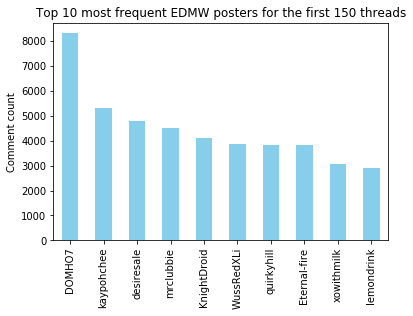

In [24]:
fig, ax = plt.subplots()
top_commentors.plot(kind='bar', x='main_category', y='n', ax=ax, color='skyblue')
# Add the ylabel using ax.set_ylabel()
ax.set_ylabel("Comment count")
ax.set_title("Top 10 most frequent EDMW posters for the first 150 threads")

In [25]:
top_comment_df = eda_sorted_df[eda_sorted_df['comment_author'] == 'DOMHO7']
top_comment_df

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week,lenstring,comment_boolean
66883,235,Cycling peeps lip lai - Part 2,DOMHO7,"09-01-2020, 05:56 PM",Wa crocs & water snakes ah. Danger ah.,2020-01-09 17:56:00,Wednesday,38,38.0
66885,237,Cycling peeps lip lai - Part 2,DOMHO7,"09-01-2020, 07:47 PM",Big snakes if u can catch later make tonic sou...,2020-01-09 19:47:00,Wednesday,61,61.0
66890,239,Cycling peeps lip lai - Part 2,DOMHO7,"09-01-2020, 08:35 PM",Cook in soup shiok,2020-01-09 20:35:00,Wednesday,18,18.0
66932,265,Cycling peeps lip lai - Part 2,DOMHO7,"11-01-2020, 04:09 PM",Anyone here training for 2020 Taiwan KOM,2020-01-11 16:09:00,Wednesday,40,40.0
66937,269,Cycling peeps lip lai - Part 2,DOMHO7,"11-01-2020, 08:43 PM",Taiwan round island song ah,2020-01-11 20:43:00,Wednesday,27,27.0
67053,3,Cycling peeps lip lai - Part 2,DOMHO7,"31-12-2019, 10:53 AM",Welcome the Yr 2020 with a new part,2019-12-31 10:53:00,Wednesday,35,35.0
67058,8,Cycling peeps lip lai - Part 2,DOMHO7,"31-12-2019, 11:00 AM",Ok noted. Tks,2019-12-31 11:00:00,Wednesday,13,13.0
71731,3124,Do u all belive in bazi / zi wei dou shu? - Pa...,DOMHO7,"02-05-2020, 01:13 AM",Hi am new here. Pardon me. How to read the min...,2020-05-02 01:13:00,Sunday,54,54.0
139488,5193,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 01:25 PM",Grizz u whack hard boil eggs song,2020-05-01 13:25:00,Friday,33,33.0
139498,5203,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 01:52 PM",I nong time didn't take exams think sure damn ...,2020-05-01 13:52:00,Friday,51,51.0


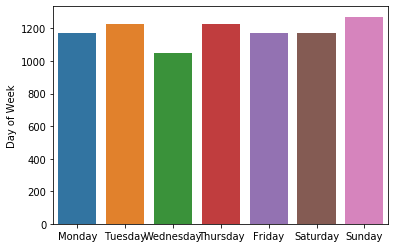

In [26]:
sns.barplot(top_comment_df["Day of Week"].value_counts().index, 
            top_comment_df["Day of Week"].value_counts(),
           order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'])

In [27]:
top_comment_df['hour'] = top_comment_df['formatted_date'].dt.hour
top_comment_df

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week,lenstring,comment_boolean,hour
66883,235,Cycling peeps lip lai - Part 2,DOMHO7,"09-01-2020, 05:56 PM",Wa crocs & water snakes ah. Danger ah.,2020-01-09 17:56:00,Wednesday,38,38.0,17
66885,237,Cycling peeps lip lai - Part 2,DOMHO7,"09-01-2020, 07:47 PM",Big snakes if u can catch later make tonic sou...,2020-01-09 19:47:00,Wednesday,61,61.0,19
66890,239,Cycling peeps lip lai - Part 2,DOMHO7,"09-01-2020, 08:35 PM",Cook in soup shiok,2020-01-09 20:35:00,Wednesday,18,18.0,20
66932,265,Cycling peeps lip lai - Part 2,DOMHO7,"11-01-2020, 04:09 PM",Anyone here training for 2020 Taiwan KOM,2020-01-11 16:09:00,Wednesday,40,40.0,16
66937,269,Cycling peeps lip lai - Part 2,DOMHO7,"11-01-2020, 08:43 PM",Taiwan round island song ah,2020-01-11 20:43:00,Wednesday,27,27.0,20
67053,3,Cycling peeps lip lai - Part 2,DOMHO7,"31-12-2019, 10:53 AM",Welcome the Yr 2020 with a new part,2019-12-31 10:53:00,Wednesday,35,35.0,10
67058,8,Cycling peeps lip lai - Part 2,DOMHO7,"31-12-2019, 11:00 AM",Ok noted. Tks,2019-12-31 11:00:00,Wednesday,13,13.0,11
71731,3124,Do u all belive in bazi / zi wei dou shu? - Pa...,DOMHO7,"02-05-2020, 01:13 AM",Hi am new here. Pardon me. How to read the min...,2020-05-02 01:13:00,Sunday,54,54.0,1
139488,5193,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 01:25 PM",Grizz u whack hard boil eggs song,2020-05-01 13:25:00,Friday,33,33.0,13
139498,5203,LAI LIAO LAI LIAO! Regina Kam Saga Continues! ...,DOMHO7,"01-05-2020, 01:52 PM",I nong time didn't take exams think sure damn ...,2020-05-01 13:52:00,Friday,51,51.0,13


Text(0, 0.5, 'frequency')

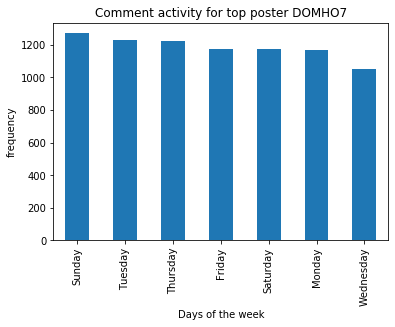

In [28]:
top_comment_count_df = top_comment_df['Day of Week'].str.split(expand=True).stack().value_counts().nlargest(7).plot.bar()
plt.title('Comment activity for top poster DOMHO7')
plt.xlabel('Days of the week')
plt.ylabel('frequency')


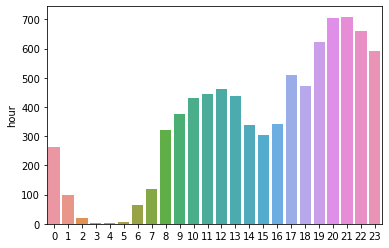

In [29]:
sns.barplot(top_comment_df['hour'].value_counts().index, top_comment_df['hour'].value_counts())

In [30]:
top_comment_2_df = eda_sorted_df[eda_sorted_df['comment_author'] == 'kaypohchee']
top_comment_2_df

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week,lenstring,comment_boolean
3949,3823,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"01-04-2020, 11:59 PM",Ya - was told to only use MamaLemon\n\nIMO - d...,2020-04-01 23:59:00,Friday,393,393.0
3951,3217,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"01-05-2019, 02:30 AM",Just completed Day 3 of HIP - last block here ...,2019-05-01 02:30:00,Friday,3498,3498.0
3952,3220,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"01-05-2019, 03:42 PM",The temp portable night toilet placed in kitch...,2019-05-01 15:42:00,Friday,2449,2449.0
3953,3221,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"01-05-2019, 04:06 PM",From the video n info ...seems they skipped do...,2019-05-01 16:06:00,Friday,1181,1181.0
4095,3599,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"02-01-2020, 11:51 PM",I switched the conventional direction for the ...,2020-01-02 23:51:00,Thursday,385,385.0
4135,1563,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"02-08-2017, 01:51 AM",My guess is for those to step up n use as a sq...,2017-08-02 01:51:00,Thursday,123,123.0
4136,1572,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"02-08-2017, 02:04 PM",Each toilet is $500 for 5-room\r\nEASE very ve...,2017-08-02 14:04:00,Thursday,297,297.0
4138,1565,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"02-08-2017, 02:26 AM",[QUOTE=blue00;109535159] T\nYa was rather surp...,2017-08-02 02:26:00,Friday,322,322.0
4139,1573,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"02-08-2017, 02:30 PM",These pics may help,2017-08-02 14:30:00,Friday,19,19.0
4141,1567,(Question) Those who did HDB toilet upgrading ...,kaypohchee,"02-08-2017, 04:30 AM",But different viewpoints from the toilet users...,2017-08-02 04:30:00,Friday,442,442.0


Text(0, 0.5, 'frequency')

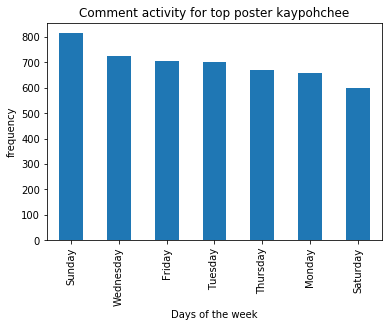

In [31]:
top_comment_count2_df = top_comment_2_df['Day of Week'].str.split(expand=True).stack().value_counts().nlargest(7).plot.bar()
plt.title('Comment activity for top poster kaypohchee')
plt.xlabel('Days of the week')
plt.ylabel('frequency')


In [32]:
top_comment_3_df = eda_sorted_df[eda_sorted_df['comment_author'] == 'Eternal-fire']
top_comment_3_df

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week,lenstring,comment_boolean
51,6,,Eternal-fire,"20-04-2020, 09:47 PM",Knn dun waste time.,2020-04-20 21:47:00,Monday,19,19.0
9487,5035,23 Year Old guy take home pay of $1600 decent ...,Eternal-fire,"04-02-2020, 07:19 PM",Who cares you are already dead. Why care so much?,2020-02-04 19:19:00,Friday,49,49.0
9640,5134,23 Year Old guy take home pay of $1600 decent ...,Eternal-fire,"05-02-2020, 01:37 PM",This thread can be so depressing.,2020-02-05 13:37:00,Tuesday,33,33.0
10951,4298,23 Year Old guy take home pay of $1600 decent ...,Eternal-fire,"13-12-2019, 06:52 PM",Humble brag.,2019-12-13 18:52:00,Saturday,12,12.0
12289,4078,23 Year Old guy take home pay of $1600 decent ...,Eternal-fire,"21-07-2019, 01:26 AM",My pay is 1.32k per month. \n\r\nYou are bette...,2019-07-21 01:26:00,Saturday,53,53.0
13970,4446,23 Year Old guy take home pay of $1600 decent ...,Eternal-fire,"30-12-2019, 08:14 AM",Tell her marrying is for pu$$ies,2019-12-30 08:14:00,Tuesday,32,32.0
13984,4460,23 Year Old guy take home pay of $1600 decent ...,Eternal-fire,"30-12-2019, 08:40 AM",Actually just give up. \n\nToo much effort.,2019-12-30 08:40:00,Tuesday,41,41.0
14007,4483,23 Year Old guy take home pay of $1600 decent ...,Eternal-fire,"30-12-2019, 12:29 PM",Not choice. Just take the path of least resist...,2019-12-30 12:29:00,Tuesday,51,51.0
14130,4523,23 Year Old guy take home pay of $1600 decent ...,Eternal-fire,"31-12-2019, 05:40 PM",But many 20 something sinkie girls look like m...,2019-12-31 17:40:00,Wednesday,52,52.0
31364,35,Actually Angela Lim on CNA is not bad also,Eternal-fire,"10-02-2020, 06:22 PM",Luohan fish,2020-02-10 18:22:00,Thursday,11,11.0


Text(0, 0.5, 'frequency')

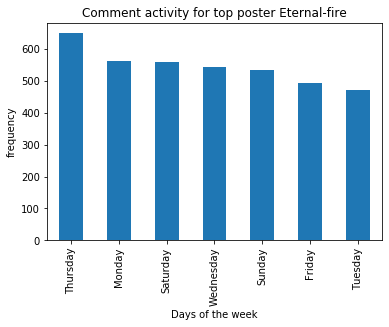

In [33]:
top_comment_count3_df = top_comment_3_df['Day of Week'].str.split(expand=True).stack().value_counts().nlargest(7).plot.bar()
plt.title('Comment activity for top poster Eternal-fire')
plt.xlabel('Days of the week')
plt.ylabel('frequency')


## barplot of the frequency of their posts (use a groupyby) for top three most frequent posters - using size instead of count

In [34]:
eda_sorted2_df = eda_sorted_df.dropna()
eda_sorted2_df.reset_index(drop=True)

,Unnamed: 0,thread_title,comment_author,date,comment,formatted_date,Day of Week,lenstring,comment_boolean
0,49,,AUTUMN&WINTER,"02-05-2020, 09:30 AM","Recite ""Namo Amituofo "" and ""Namo Guan Shi Yin...",2020-05-02 09:30:00,Saturday,76,76.0
1,51,,AUTUMN&WINTER,"07-05-2020, 01:27 PM","Instead of worrying, why not recite Buddha's a...",2020-05-07 13:27:00,Thursday,76,76.0
2,53,,Laneige,"07-05-2020, 01:39 PM",Unfortunately she made the decision to go shop...,2020-05-07 13:39:00,Thursday,156,156.0
3,54,,SimpliCity2k,"07-05-2020, 04:40 PM",pls enlighten if so Namo Amitabha Namo Buddh...,2020-05-07 16:40:00,Sunday,58,58.0
4,56,,AUTUMN&WINTER,"07-05-2020, 07:49 PM",Reminds me of passed down (mentioned at 6:0...,2020-05-07 19:49:00,Sunday,577,577.0
5,58,,AUTUMN&WINTER,"10-05-2020, 09:31 AM","As the pandemic sweeps through the world, we r...",2020-05-10 09:31:00,Monday,118,118.0
6,59,,Hierophant,"10-05-2020, 09:32 AM",Hokay ish noted,2020-05-10 09:32:00,Tuesday,15,15.0
7,0,,mryang,"10-05-2020, 11:12 AM",https://www.zaobao.com.sg/znews/sing...200509-...,2020-05-10 11:12:00,Saturday,53,53.0
8,57,,SimpliCity2k,"10-05-2020, 12:26 AM",Namo Amitabha,2020-05-10 00:26:00,Friday,13,13.0
9,60,,SimpliCity2k,"11-05-2020, 10:17 PM",Namo Amitabha,2020-05-11 22:17:00,Friday,13,13.0


In [35]:
# Write your code here to created the aggregated df
sd_agg = eda_sorted2_df.groupby(['comment_author']).size().nlargest(10)
sd_agg

comment_author
DOMHO7          8295
kaypohchee      4878
KnightDroid     4093
desiresale      4063
WussRedXLi      3863
Eternal-fire    3817
quirkyhill      3752
mrclubbie       3187
xowithmilk      3058
lemondrink      2909
dtype: int64

Text(0.5, 1.0, 'Top 10 most frequent EDMW posters for the first 150 threads')

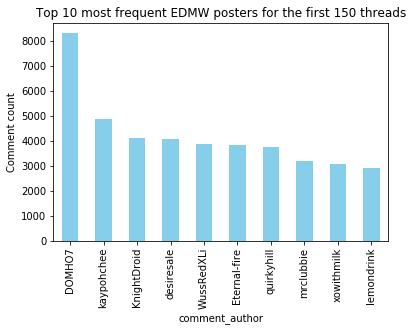

In [36]:
fig, ax = plt.subplots()
sd_agg.plot(kind='bar', x='main_category', y='n', ax=ax, color='skyblue')
# Add the ylabel using ax.set_ylabel()
ax.set_ylabel("Comment count")
ax.set_title("Top 10 most frequent EDMW posters for the first 150 threads")

# Latent Dirichlet Allocation with Gensim 

In [37]:
!python -m pip install -U gensim

Requirement already up-to-date: gensim in c:\users\asus\anaconda3\lib\site-packages (3.8.3)


In [38]:
!python -m pip install -U spacy

Requirement already up-to-date: spacy in c:\users\asus\anaconda3\lib\site-packages (2.3.2)


In [39]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\asus\Anaconda3\lib\site-packages\past\types\oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable


In [40]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [41]:
# Convert to list
data = eda_sorted_df.comment.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['Recite "Namo Amituofo " and "Namo Guan Shi Yin Pusa" to pacify the pandemic.']


In [42]:
len(data)

375634

In [43]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['recite', 'namo', 'amituofo', 'and', 'namo', 'guan', 'shi', 'yin', 'pusa', 'to', 'pacify', 'the', 'pandemic']]


In [44]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['recite_namo_amituofo', 'and', 'namo_guan_shi_yin', 'pusa', 'to', 'pacify', 'the', 'pandemic']


In [45]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [46]:
import en_core_web_sm

In [47]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['pusa', 'pacify', 'pandemic']]


In [48]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1)]]


In [49]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [50]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.103*"buy" + 0.059*"still" + 0.057*"say" + 0.055*"tip" + 0.051*"can" + '
  '0.039*"draw" + 0.031*"want" + 0.020*"nice" + 0.019*"feel" + 0.018*"people"'),
 (1,
  '0.077*"also" + 0.053*"overpay" + 0.038*"well" + 0.027*"maybe" + '
  '0.024*"seem" + 0.024*"clear" + 0.024*"man" + 0.021*"pick" + 0.019*"player" '
  '+ 0.017*"become"'),
 (2,
  '0.093*"good" + 0.053*"look" + 0.038*"many" + 0.031*"never" + 0.024*"high" + '
  '0.024*"ball" + 0.023*"start" + 0.023*"support" + 0.022*"form" + '
  '0.013*"sound"'),
 (3,
  '0.072*"goal" + 0.058*"even" + 0.054*"app" + 0.043*"think" + 0.038*"really" '
  '+ 0.034*"whack" + 0.031*"game" + 0.029*"team" + 0.029*"play" + '
  '0.029*"make"'),
 (4,
  '0.069*"match" + 0.068*"today" + 0.064*"see" + 0.055*"odd" + 0.048*"use" + '
  '0.030*"next" + 0.029*"thank" + 0.025*"tonight" + 0.024*"new" + '
  '0.023*"later"'),
 (5,
  '0.074*"time" + 0.046*"try" + 0.042*"last" + 0.036*"need" + 0.031*"follow" + '
  '0.030*"year" + 0.030*"already" + 0.029*"back" + 0.02

In [51]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\Users\asus\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.169470 -0.046447       1        1  13.892488
8     -0.375130 -0.035783       2        1  11.933708
3     -0.070990 -0.301985       3        1  11.553562
2      0.106708  0.055001       4        1  11.003765
0      0.016024 -0.072021       5        1  10.785935
1      0.073705  0.013148       6        1  10.532442
4      0.006537  0.024942       7        1   9.349813
9     -0.102277  0.331795       8        1   8.325443
6      0.126299 -0.005984       9        1   8.296054
7      0.049653  0.037332      10        1   4.326796, topic_info=      Category          Freq      Term         Total  loglift  logprob
230    Default  59202.000000       get  59202.000000  30.0000  30.0000
13     Default  55546.000000        go  55546.000000  29.0000  29.0000
679    Default  35750.000000      lose  35750.000000  28.0000  28.0000
654    Default  48660.000000       buy  48660.000000  27.0000  27.0000
1266   Default  41185.000000       bet  41185.000000  26.0000  26.0000
128    Default  45116.000000      good  45116.000000  25.0000  25.0000
49     Default  45228.000000      time  45228.000000  24.0000  24.0000
278    Default  35678.000000       win  35678.000000  23.0000  23.0000
8      Default  35656.000000      also  35656.000000  22.0000  22.0000
6915   Default  36647.000000      goal  36647.000000  21.0000  21.0000
98     Default  28552.000000      give  28552.000000  20.0000  20.0000
855    Default  28448.000000     match  28448.000000  19.0000  19.0000
420    Default  27915.000000     today  27915.000000  18.0000  18.0000
11     Default  29284.000000      even  29284.000000  17.0000  17.0000
177    Default  28102.000000     still  28102.000000  16.0000  16.0000
61     Default  25007.000000      come  25007.000000  15.0000  15.0000
232    Default  26144.000000       see  26144.000000  14.0000  14.0000
176    Default  27170.000000       say  27170.000000  13.0000  13.0000
875    Default  27637.000000       app  27637.000000  12.0000  12.0000
718    Default  23326.000000     score  23326.000000  11.0000  11.0000
1924   Default  25827.000000       tip  25827.000000  10.0000  10.0000
426    Default  25612.000000      look  25612.000000   9.0000   9.0000
328    Default  27825.000000       try  27825.000000   8.0000   8.0000
5131   Default  24574.000000   overpay  24574.000000   7.0000   7.0000
1615   Default  22715.000000       odd  22715.000000   6.0000   6.0000
171    Default  24119.000000       can  24119.000000   5.0000   5.0000
48     Default  24807.000000      take  24807.000000   4.0000   4.0000
222    Default  16192.000000     money  16192.000000   3.0000   3.0000
321    Default  25670.000000      last  25670.000000   2.0000   2.0000
58     Default  20106.000000     world  20106.000000   1.0000   1.0000
...        ...           ...       ...           ...      ...      ...
71     Topic10  15676.167969     first  15678.987305   3.1402  -2.4947
52     Topic10   7942.645996     watch   7945.465820   3.1400  -3.1746
698    Topic10   6121.874512     early   6124.693848   3.1399  -3.4350
837    Topic10   4653.343262      free   4656.162598   3.1397  -3.7092
794    Topic10   4365.082031    online   4367.901367   3.1397  -3.7732
217    Topic10   3660.399170       com   3663.218262   3.1396  -3.9493
814    Topic10   2897.896973     movie   2900.719238   3.1394  -4.1828
781    Topic10   2486.030029    report   2488.849365   3.1392  -4.3361
799    Topic10   2118.625732     https   2121.444824   3.1390  -4.4961
3288   Topic10   2056.980225    second   2059.799805   3.1390  -4.5256
664    Topic10   1932.827271      kind   1935.646606   3.1389  -4.5878
798    Topic10   1917.398193     forum   1920.217407   3.1389  -4.5959
919    Topic10   1800.027710      diff   1802.847534   3.1388  -4.6590
223    Topic10   1615.422119     spend   1618.241577   3.1386  -4.7672
808    Topic10   1596.163086    series   15

In [56]:
s = 'banananananananab'
print(s[:6])
print(s[::3])
print(s[-1:10:-1])
print(s[:10:-1])
print(s[-1:-7])
print(s[-6:][::1])
print(s[0:2] + (s[-2]+ s[2])[::-1]*2)
print(s[:-11])

banana
banana
banana
banana

ananab
banana
banana
